In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
crime=pd.read_csv("C:/Users/Yogendra/Downloads/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

In [32]:
dbscan = DBSCAN(eps=1.1, min_samples=3)
dbscan.fit(scaled_crime)

DBSCAN(eps=1.1, min_samples=3)

In [33]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [34]:
crime['clusterid_new'] = dbscan.labels_

In [36]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [37]:
ulabel=np.unique(dbscan.labels_)

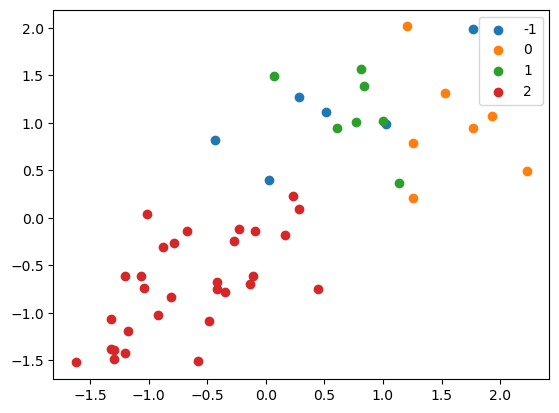

In [38]:
for i in ulabel:
    plt.scatter(scaled_crime[dbscan.labels_ == i , 0] , scaled_crime[dbscan.labels_ == i , 1] , label = i)
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_crime, dbscan.labels_)

0.28523184583363054

<Axes: xlabel='clusterid_new', ylabel='UrbanPop'>

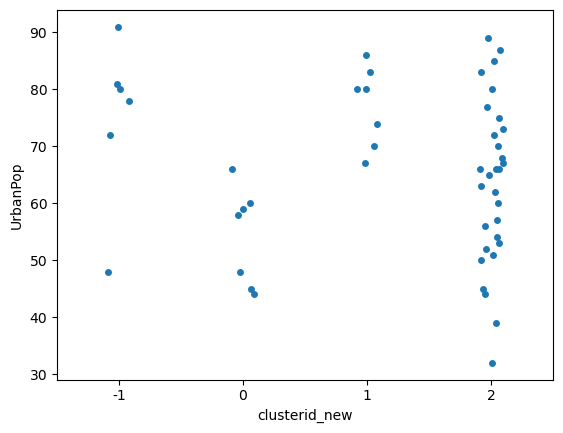

In [43]:
import seaborn as sn
sn.stripplot(data=crime, x="clusterid_new", y="UrbanPop")

<Axes: xlabel='clusterid_new', ylabel='Assault'>

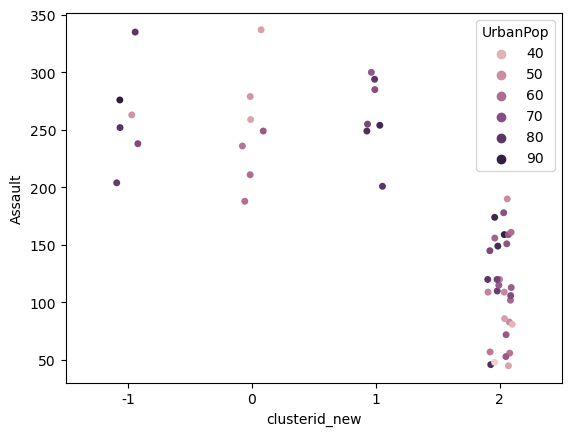

In [47]:
sn.stripplot(data=crime, x="clusterid_new", y="Assault", hue="UrbanPop")

<Axes: xlabel='clusterid_new', ylabel='Murder'>

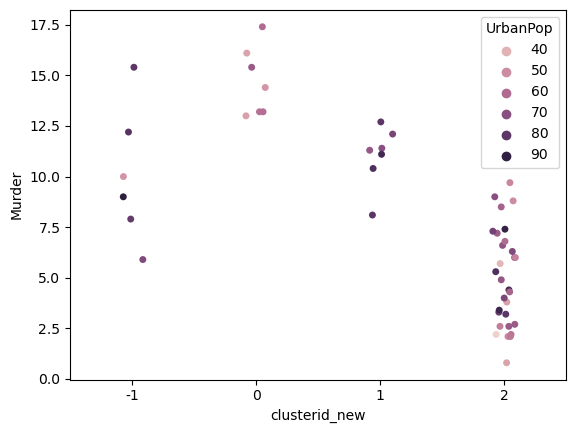

In [49]:
sn.stripplot(data=crime, x="clusterid_new", y="Murder",hue="UrbanPop")

<Axes: xlabel='clusterid_new', ylabel='Rape'>

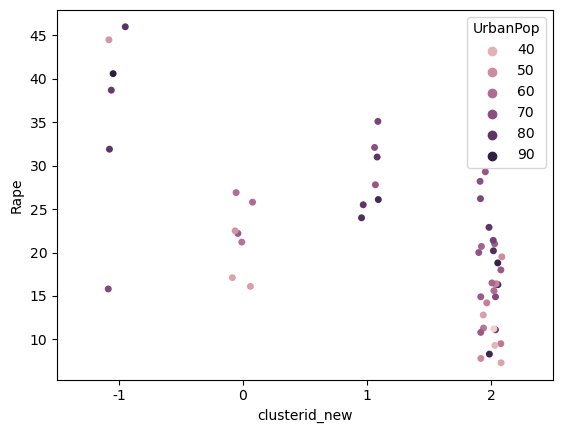

In [50]:
sn.stripplot(data=crime, x="clusterid_new", y="Rape", hue="UrbanPop")